#Definições dos dataframes

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
plt.rcParams['figure.figsize']  = (14, 8)
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3

In [5]:
df_yield = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/yield.csv?token=AKCY5EMQEPS5O7SS4AXLHGTA3TMZ2%27').drop(columns='Unnamed: 0')
df_yield.head()

,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),...,Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
0,Sorghum,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wheat,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sorghum,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wheat,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sorghum,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'DF']
estados_amazonia = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states = df_yield[['Year', 'Grain']].copy()
df_states.head()
for estado in estados:
    df_states[estado] = df_yield.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)
df_states.head()

,Year,Grain,AC,AL,AP,AM,BA,CE,ES,GO,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
0,1974,Sorghum,0.0,0.0,0.0,0.0,2.546875,1.4375,8.225373,34.665306,...,0.0,4.740299,211.890578,0.0,0.0,6.344444,90.360000,0.0,0.0,0.0
1,1974,Wheat,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,...,0.0,0.000000,220.266422,0.0,0.0,95.112192,45.910418,0.0,0.0,0.0
2,1975,Sorghum,0.0,0.0,0.0,0.0,0.000000,1.8000,10.477282,44.530196,...,0.0,3.587143,238.088987,0.0,0.0,9.444444,127.239582,0.0,0.0,0.0
3,1975,Wheat,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,...,0.0,0.000000,142.940974,0.0,0.0,66.279275,45.715157,0.0,0.0,0.0
4,1976,Sorghum,0.0,0.0,0.0,0.0,0.000000,3.8000,5.471429,46.579032,...,0.0,2.699701,224.990268,0.0,0.0,21.932371,148.338034,0.0,0.0,0.0


In [7]:
df_states['Year'] = df_states['Year'].astype(str)
df_states['Grain'] = df_states['Grain'].astype(str)

#Produção por grão

In [8]:
df_yield_per_grain = df_states.drop(columns='Year').groupby(['Grain']).sum().copy()
df_yield_per_grain.head()


,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Grain,,,,,,,,,,,,,,,,,,,,,
Barley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.539099,0.000000,0.000000,...,0.000000,0.000000,8343.818118,0.000000,0.000000,1177.748790,52.239737,0.000000,0.000000,21.720910
Beans,439.729549,1748.116210,303.971187,1993.851596,8937.150726,2205.934123,2087.409151,6506.739044,3491.460390,2560.147673,...,2158.532900,2317.544524,15635.617921,828.467181,231.031843,11181.063211,19681.913109,1519.761779,1564.685811,72.793029
Fava Beans,0.000000,470.667295,0.000000,0.000000,447.140050,651.992667,4.600000,17.283728,552.848708,0.000000,...,9.639286,546.281646,961.253507,0.000000,0.000000,3.333333,82.105952,714.603770,27.483135,0.000000
Maize,1290.953085,2162.766860,431.794972,4326.570858,13646.319173,4369.027132,5816.192619,33500.423479,7182.404805,14535.964923,...,4816.636155,2765.214935,57406.396548,2959.155587,821.036730,43024.834327,82665.605902,3741.976533,8650.376060,203.166836
Oats,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,3.320000,0.000000,12.100000,...,0.000000,0.000000,9888.309606,0.000000,0.000000,1502.377255,322.547026,0.000000,0.000000,3.600000


In [9]:
df_yield_per_grain.insert(0, 'Total', np.zeros(df_yield_per_grain.index.shape))

In [10]:
for grain in df_yield_per_grain.index:
  df_yield_per_grain['Total'].loc[grain] = df_yield_per_grain.drop(columns='Total').loc[grain].sum()
df_yield_per_grain['Total']

Grain
Barley          495.538152
Beans          5017.570699
Fava Beans      341.495943
Maize         17629.826735
Oats            687.064822
Pea             274.285531
Rye             117.184671
Sorghum        1625.348931
Soybeans       5702.503883
Wheat          2329.750595
Name: Total, dtype: float64

<AxesSubplot:title={'center':'Produção por grão'}, xlabel='Grain'>

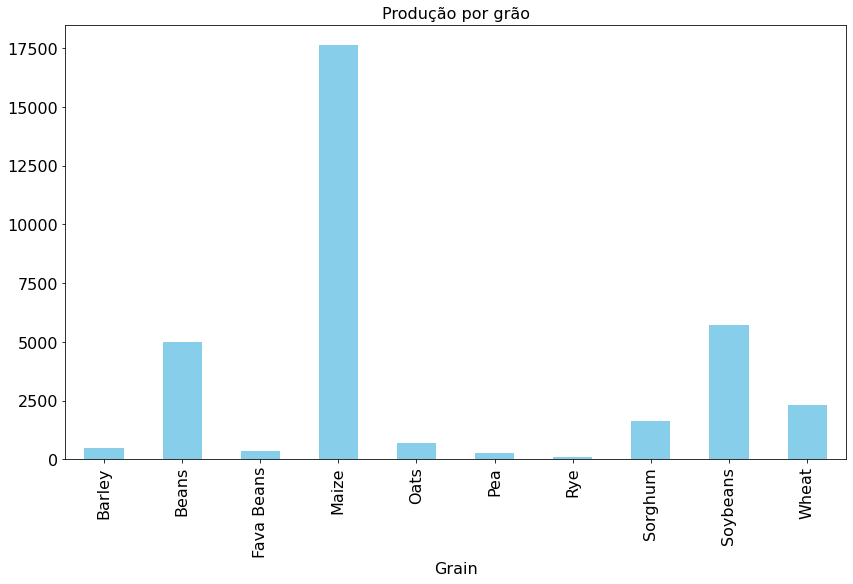

In [11]:
df_yield_per_grain['Total'].plot.bar(x='Grain', title='Produção por grão', color='skyblue')

#Produção por grão por ano

In [12]:
df_yield_per_grain_per_year = df_states.groupby(['Grain', 'Year']).sum().copy()
df_yield_per_grain_per_year.head()

AC   AL   AP   AM   BA   CE   ES   GO   MA   MT  ...   RJ   RN  \
Grain  Year                                                    ...             
Barley 1974  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
       1975  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
       1976  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
       1977  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
       1978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                     RS   RO   RR         SC   SP   SE   TO   DF  
Grain  Year                                                       
Barley 1974   66.890214  0.0  0.0  22.388034  0.0  0.0  0.0  0.0  
       1975   67.029177  0.0  0.0  23.066116  0.0  0.0  0.0  0.0  
       1976   80.665428  0.0  0.0  23.747213  0.0  0.0  0.0  0.0  
       1977   70.061123  0.0  0.0  22.244287  0.0  0.0  0.0  0.0  
       1978  110.123614  0.0  0.0  28.226130  0.0  0.0  0.0  0.0  

[5 rows x 27 columns]

In [13]:
df_yield_per_grain_per_year['Total'] = df_yield_per_grain_per_year.sum(axis=1)
df_yield_per_grain_per_year['Total'].head()

Grain   Year
Barley  1974    101.149147
        1975    110.788449
        1976    129.867100
        1977    135.328915
        1978    196.981601
Name: Total, dtype: float64

([<matplotlib.axis.XTick at 0x2ca0b3d13d0>,
 [Text(0, 0, '1974'),
  Text(10, 0, '1984'),
  Text(20, 0, '1994'),
  Text(30, 0, '2004'),
  Text(40, 0, '2014'),
  Text(45, 0, '2019')])

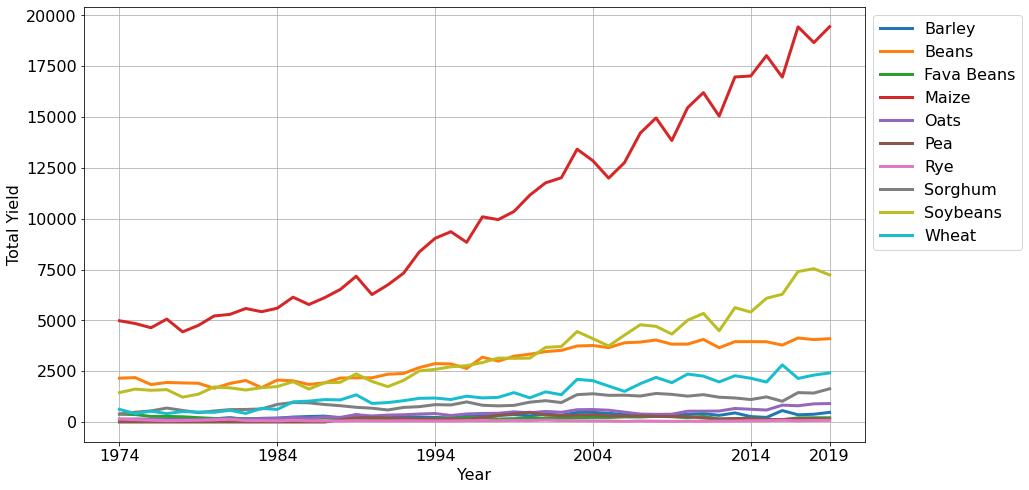

In [14]:
df_yield_per_grain_per_year.groupby('Grain')['Total'].plot(legend=True, xlabel='Year', ylabel='Total Yield', grid=True)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks([0,10,20,30,40,45], [1974, 1984, 1994, 2004, 2014,2019])

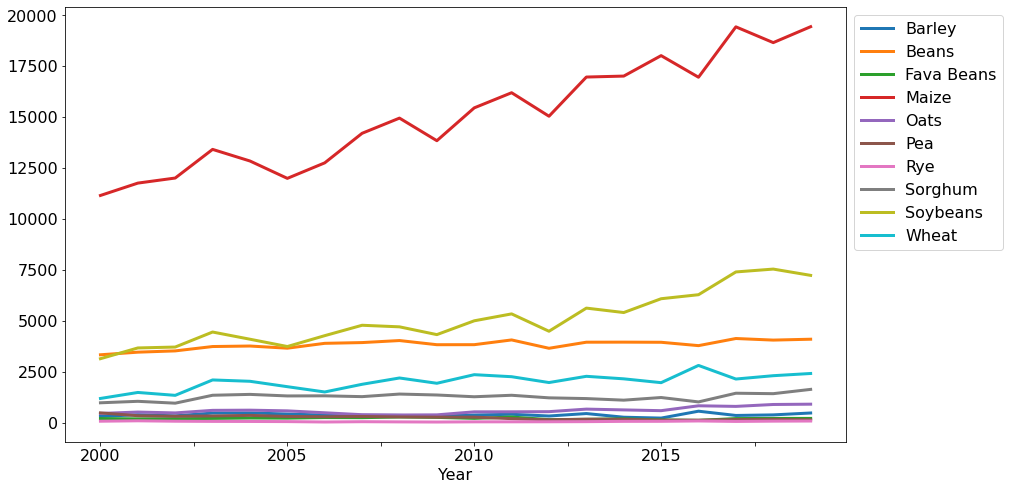

In [15]:
df_yield_per_grain_per_year[df_yield_per_grain_per_year.index.get_level_values('Year') >= '2000']['Total'].unstack(level=0).plot(kind='line', subplots=False)
plt.legend(bbox_to_anchor=(1,1))

#Produção total por ano

In [16]:
df_years = df_states.groupby(['Year']).sum().copy()
df_years.head()

,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Year,,,,,,,,,,,,,,,,,,,,,
1974,13.318421,111.853297,5.632143,103.013066,630.374037,125.635528,94.617107,452.361211,159.031157,74.329863,...,97.494346,117.250229,1503.507461,6.073102,3.449153,898.953496,1806.977185,88.844154,98.582485,3.309317
1975,12.807167,86.943905,5.784848,102.368848,619.438045,172.783804,101.587032,404.296656,166.860827,80.645045,...,101.637132,115.612432,1483.543235,6.301865,3.372592,914.024812,1847.030416,75.740748,71.593819,1.462243
1976,15.292671,64.380832,5.333333,76.840000,391.242153,111.839455,67.515422,453.241021,161.584144,71.167229,...,85.276552,86.565988,1514.693423,4.863832,2.955974,862.034941,1944.660081,52.002214,87.233188,4.443578
1977,22.304297,104.271480,5.168103,90.907884,433.839206,169.701351,99.585599,428.043208,163.296967,89.449089,...,72.325134,153.094045,1470.840723,4.320209,3.109189,839.746530,2015.605287,82.246789,74.745284,4.038663
1978,22.817095,90.099741,5.121096,84.000000,547.107084,159.786288,91.341129,363.864483,162.035197,93.573347,...,66.808856,115.443148,1468.925135,14.630568,2.732310,683.356792,1681.932588,78.544012,82.664741,5.117101


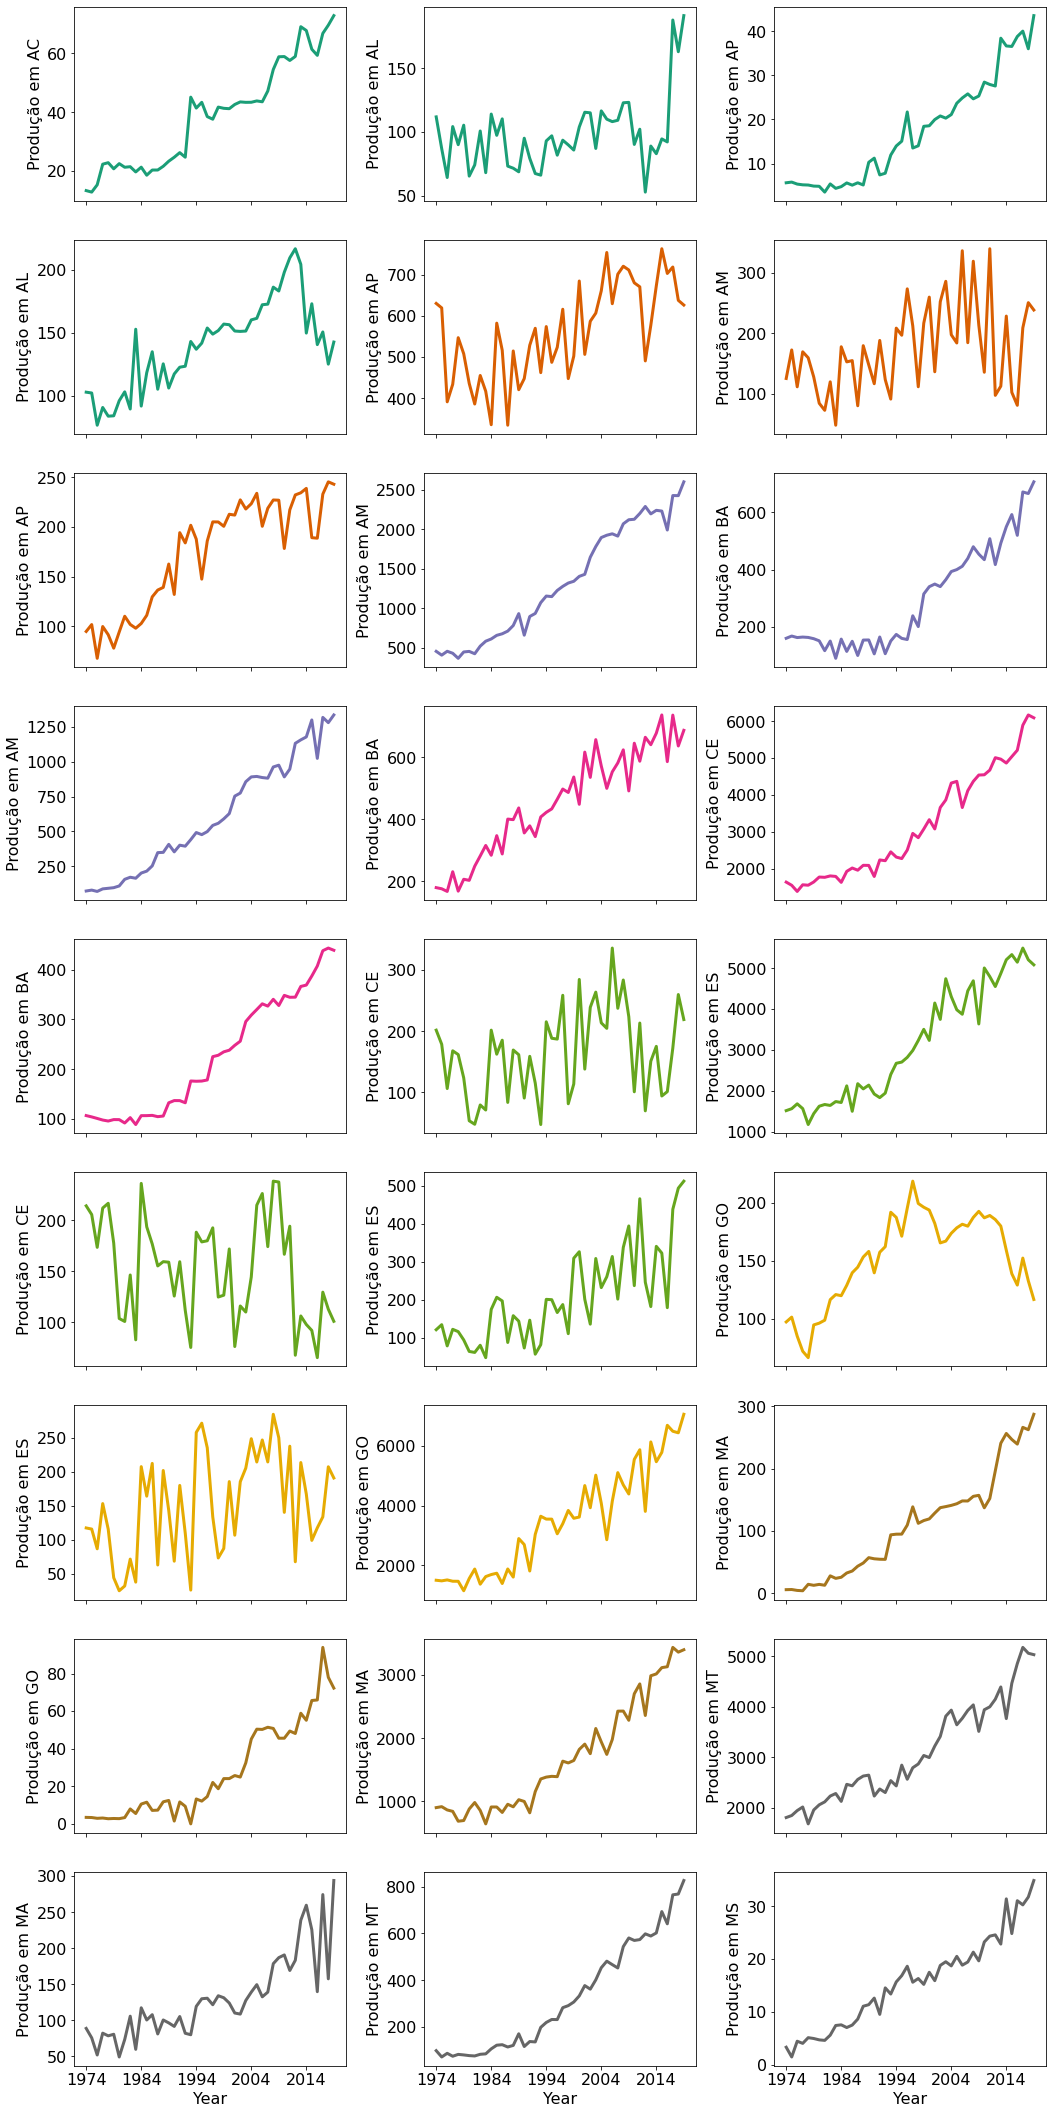

In [17]:
axes = df_years.plot(figsize=(15, 30), subplots=True, layout=(9,3), legend=False, sharex=True, colormap='Dark2')
plt.tight_layout(pad=3)
for i in range(9):
    for j in range(3):
        axes[i][j].set_ylabel('Produção em {}'.format(estados[i+j]))

#Divisão por presidentes

In [18]:
df_years.head()

,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Year,,,,,,,,,,,,,,,,,,,,,
1974,13.318421,111.853297,5.632143,103.013066,630.374037,125.635528,94.617107,452.361211,159.031157,74.329863,...,97.494346,117.250229,1503.507461,6.073102,3.449153,898.953496,1806.977185,88.844154,98.582485,3.309317
1975,12.807167,86.943905,5.784848,102.368848,619.438045,172.783804,101.587032,404.296656,166.860827,80.645045,...,101.637132,115.612432,1483.543235,6.301865,3.372592,914.024812,1847.030416,75.740748,71.593819,1.462243
1976,15.292671,64.380832,5.333333,76.840000,391.242153,111.839455,67.515422,453.241021,161.584144,71.167229,...,85.276552,86.565988,1514.693423,4.863832,2.955974,862.034941,1944.660081,52.002214,87.233188,4.443578
1977,22.304297,104.271480,5.168103,90.907884,433.839206,169.701351,99.585599,428.043208,163.296967,89.449089,...,72.325134,153.094045,1470.840723,4.320209,3.109189,839.746530,2015.605287,82.246789,74.745284,4.038663
1978,22.817095,90.099741,5.121096,84.000000,547.107084,159.786288,91.341129,363.864483,162.035197,93.573347,...,66.808856,115.443148,1468.925135,14.630568,2.732310,683.356792,1681.932588,78.544012,82.664741,5.117101


In [19]:
anos_por_presidente = [['1974', '1975', '1976', '1977', '1978'], ['1979', '1980', '1981', '1982', '1983', '1984'], ['1985', '1986', '1987', '1988', '1989'], ['1990', '1991', '1992'], ['1993', '1994'], ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002'], ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], ['2011', '2012', '2013', '2014', '2015', '2016'], ['2017', '2018'], ['2019']]
presidentes = ['Ernesto Geisel', 'João Figueiredo', 'José Sarney', 'Fernando Collor', 'Itamar Franco', 'Fernando Henrique Cardoso', 'Lula', 'Dilma Rousseff', 'Michel Temer', 'Jair Bolsonaro']

In [20]:
df_president = pd.DataFrame(index=presidentes)

In [21]:
df_president[estados] = np.zeros((len(df_president.index), len(estados)))

In [22]:
for i in range(len(anos_por_presidente)):
    for estado in estados:
        df_president.iloc[i].loc[estado] = df_years[estado].loc[anos_por_presidente[i]].mean()
df_president.head()

,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Ernesto Geisel,17.307930,91.509851,5.407905,91.425960,524.400105,147.949285,90.929258,420.361315,162.561658,81.832915,...,84.708404,117.593168,1488.301995,7.237915,3.123844,839.623314,1859.241111,75.475583,82.963903,3.674180
João Figueiredo,21.150465,88.022600,4.621007,103.063311,422.961693,105.392750,97.347192,504.511048,136.281725,151.153748,...,108.013164,69.516910,1547.645214,19.839114,5.493862,825.949557,2128.842033,81.082259,84.694976,5.803720
José Sarney,20.821531,84.305340,6.346157,118.129909,473.771301,143.347785,135.700999,749.879268,133.285451,315.441519,...,144.937515,156.743971,1904.895341,43.684310,10.039069,923.805358,2546.591500,97.306075,130.492030,9.119482
Fernando Collor,25.195284,80.677339,8.806636,121.271949,515.457397,143.051121,170.056899,828.113878,124.352367,383.657433,...,153.086980,119.246394,2517.387588,54.963419,7.500969,988.831335,2301.734905,93.006520,130.027228,12.226437
Itamar Franco,43.253829,79.630886,12.945833,140.111806,518.138037,150.182791,194.740134,1111.829077,161.047403,466.965024,...,189.544495,141.822708,3598.312308,94.386534,6.624049,1367.781621,2484.861065,99.719453,208.854126,14.524670


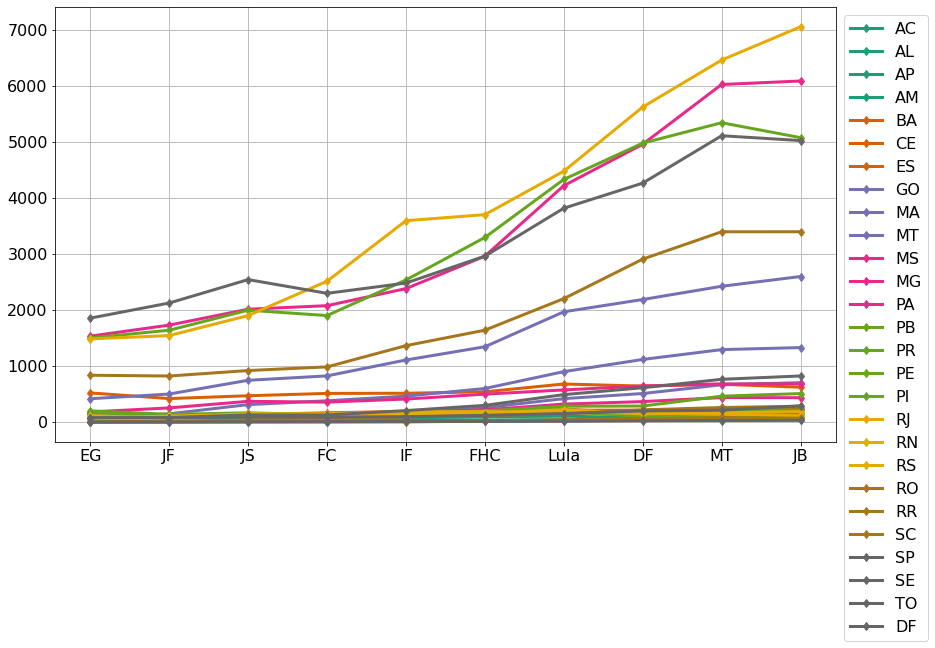

In [21]:
df_president.plot(colormap='Dark2', grid=True, marker='d')
plt.xticks(range(10), ['EG', 'JF', 'JS', 'FC', 'IF', 'FHC', 'Lula', 'DF', 'MT', 'JB'])
plt.legend(bbox_to_anchor=(1,1))

In [23]:
def bootstrap_median(df, n_sub, alpha):
  row = 'Lula'
  size = len(df.columns)
  values = np.zeros(n_sub)
  for i in range(n_sub):
    sample = df.loc[row].sample(size, replace=True, random_state=i)
    values[i] = sample.median()
  perc = (100-(alpha*100))/2
  LI = np.percentile(values, perc).round(4)
  LS = np.percentile(values, alpha*100 + perc).round(4)
  return values, (LI, LS)

In [24]:
values, (LI, LS) = bootstrap_median(df=df_president, n_sub=5000, alpha=0.95)

In [28]:
def bootstrap_median(df, n_sub, alpha):
  row = 'Lula'
  size = len(df.columns)
  values = np.zeros(n_sub)
  for i in range(n_sub):
    sample = df.loc[row].sample(size, replace=True, random_state=i)
    values[i] = sample.median()
  perc = (100-(alpha*100))/2
  LI = np.percentile(values, perc).round(4)
  LS = np.percentile(values, alpha*100 + perc).round(4)
  return values, (LI, LS)

In [29]:
p1 = 'Lula'
p2 = 'Fernando Collor'

In [30]:
def bootstrap_median_ab(df1, df2, p1, p2, n=10000):
    size1 = len(df1.columns)
    size2 = len(df2.columns)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1.sample(size1, replace=True, random_state=i)
        sample2 = df2.sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.median().loc[p1]
        values2[i] = sample2.median().loc[p2]
        values_diff[i] = sample1.median().loc[p1] - sample2.median().loc[p2]
    return values1, values2, values_diff

In [31]:
values1, values2, values_diff = bootstrap_median_ab(pd.DataFrame(df_president.loc[p1]), pd.DataFrame(df_president.loc[p2]), p1, p2)

(array([ 274.,  493.,  294.,   68.,  275.,  322., 1359., 3533.,  976.,
         303.,   51.,   76.,  411.,  288.,   42.,   34.,   43.,  289.,
         279.,  590.]),
 array([-2497.24062814, -2148.67185507, -1800.103082  , -1451.53430893,
        -1102.96553586,  -754.39676279,  -405.82798972,   -57.25921665,
          291.30955642,   639.87832949,   988.44710256,  1337.01587562,
         1685.58464869,  2034.15342176,  2382.72219483,  2731.2909679 ,
         3079.85974097,  3428.42851404,  3776.99728711,  4125.56606018,
         4474.13483325]),
 <BarContainer object of 20 artists>)

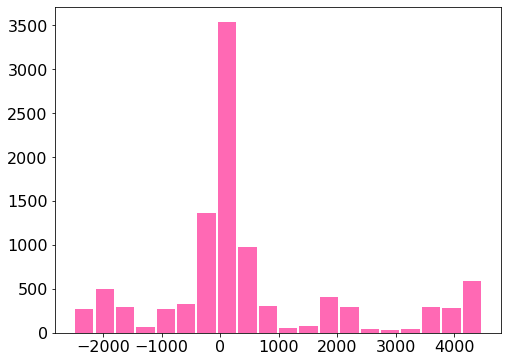

In [38]:
plt.hist(values_diff, bins=20, color='hotpink', rwidth=0.9)

In [33]:
def show_boxplots(v1, v2, p1, p2):
    bp_data = [v1, v2]
    plt.rcParams['figure.figsize']  = (8, 6)
    plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
    plt.grid(True)
    plt.xticks([1,2], [p1, p2], fontsize=10)
    plt.ylabel('', fontsize=13)
    plt.xlabel('Presidente', fontsize=12)
    plt.title('Quantidade média de produção', fontsize=14)
    plt.show()

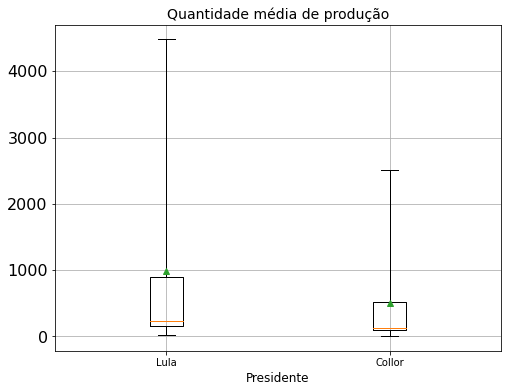

In [34]:
show_boxplots(values1, values2, 'Lula', 'Collor')

In [39]:
p1 = 'Ernesto Geisel'
p2 = 'Jair Bolsonaro'
v_eg, v_jb, v_diff_egjb = bootstrap_median_ab(pd.DataFrame(df_president.loc[p1]), pd.DataFrame(df_president.loc[p2]), p1, p2)

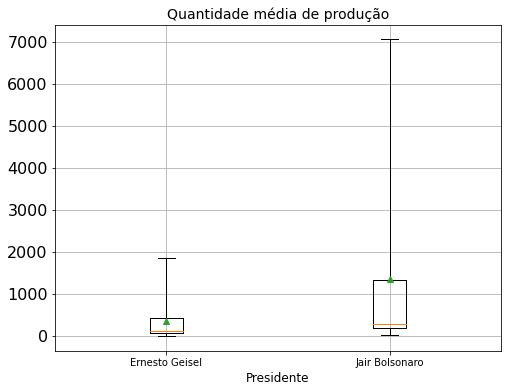

In [40]:
show_boxplots(v_eg, v_jb, p1, p2)